## train 1k, test 1k, SVM

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pandas as pd
train = pd.read_csv("../Data/train_1k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
train.head()
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# train과 test의 정답의 숫자 빈도 확인
print(train[0].value_counts().sort_index())     # sort_index: 인덱스 번호 정렬
# print(test[[0]].value_counts().sort_index())

0     98
1    116
2     99
3     93
4    105
5     92
6     94
7    117
8     87
9    100
Name: 0, dtype: int64


In [74]:
# train data의 내용 보기
import numpy as np

In [75]:
train.loc[0, train.columns != 0]

1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 784, dtype: int64

In [76]:
temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [77]:
# 줄여서 보기
tempColumns = []
temp1 = temp.reshape(28, 28)
count = 0


# 홀수인 경우인 데이터로만 줄여서 보기
for i in range(0, 29):
    if i%2 == 1:        
        for j in range(0,29):
            if j%2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

196

In [78]:
np.sqrt(196)

14.0

In [79]:
print(np.array(tempColumns).reshape(14, 14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [80]:
train_label = train.loc[:, train.columns == 0]
train_data = train.loc[:, train.columns != 0]

test_label = test.loc[:, test.columns == 0]
test_data = test.loc[:, test.columns != 0]

In [81]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [82]:
clf.score(test_data, test_label)

0.8751248751248751

In [83]:
train_data

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


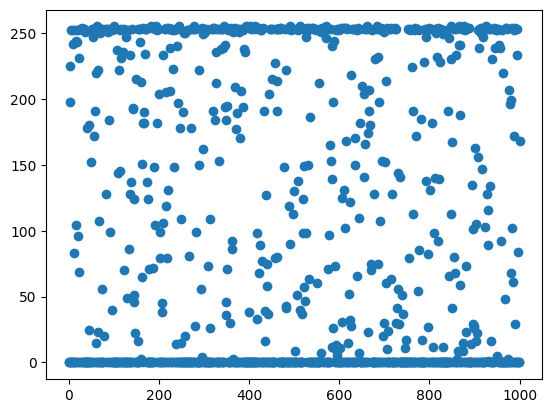

In [84]:
import matplotlib.pyplot as plt
plt.scatter(train_data.index, train_data[300])
plt.show()

In [85]:
train_data[300]

0         0
1         0
2       198
3         0
4       225
       ... 
996       0
997      84
998       0
999       0
1000    168
Name: 300, Length: 1001, dtype: int64

### 로그 변환
- 제곱의 반대     
- 큰 값을 작은 값으로 표시        
- 미분        

기본적으로 log안의 x값은 양수만 가능하다.       
하지만 0에 가까운 아주 작은 양수의 경우 (ex: 0.00000001)        
음의 무한대에 가까워지게 된다.(너무 작은값의 경우 프로그램 계산이 -inf(무한대))     
이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 된다.(그래서 log1p 사용)        
-표준화(정규화 아님)

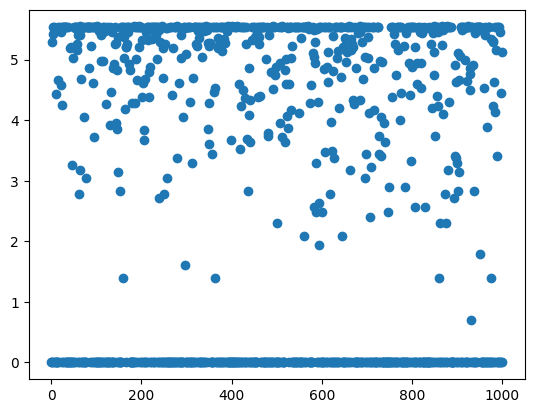

In [86]:
plt.scatter(train_data.index, np.log1p(train_data[300]))    # 1p : 1 plus
plt.show()

In [87]:
# data의 표준화
train_data = pd.DataFrame(np.log1p(train_data))
test_data = pd.DataFrame(np.log1p(test_data))

In [88]:
# train_label = train_label.loc[:, train.columns == 0]
train_data = train_data.loc[:, train_data.columns != 0]

# test_label = test_label.loc[:, test.columns == 0]
test_data = test_data.loc[:, test_data.columns != 0]

In [89]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [90]:
clf.score(test_data, test_label)    # 예측률 높아짐 (2%)

0.8901098901098901

### train 10K와 test 1K, SVM, Log

In [124]:
# 데이터 불러오기
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
train.head()
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# 데이터 정렬하기
print(train[0].value_counts().sort_index())
# target 제외하고 컬럼 보기
train.loc[0,train.columns != 0]

0    1994
1    2281
2    1929
3    2076
4    1945
5    1776
6    1971
7    2093
8    1922
9    2014
Name: 0, dtype: int64


1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 784, dtype: int64

In [126]:
temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [127]:
# 줄여서 보기
tempColumns = []
temp1 = temp.reshape(28, 28)
count = 0


# 홀수인 경우인 데이터로만 줄여서 보기
for i in range(0, 29):
    if i%2 == 1:        
        for j in range(0,29):
            if j%2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1
count

196

In [128]:
print(np.array(tempColumns).reshape(14, 14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [129]:
# data의 표준화
train_data = pd.DataFrame(np.log1p(train_data))
test_data = pd.DataFrame(np.log1p(test_data))

In [130]:
# train_label = train_data.loc[:, train_data.columns == 0]
train_data = train_data.loc[:, train_data.columns != 0]

# test_label = test.loc[:, test.columns == 0]
test_data = test_data.loc[:, test_data.columns != 0]

In [131]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [132]:
clf.score(test_data, test_label)

0.965034965034965